In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings("ignore")
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Procedure

### The data is explored for statistics and datatypes.
### The numeric columns are extracted and binned into min-25%, 25%-50,50%-75% and 75%-max ranges and replaced with the range mean.
### The job roles are clubbed using similarities.
### All non-numeric columns are one-hot encoded

In [2]:
def binRanges(x,stats):
    if x<=stats[4]:
        return (stats[3]+stats[4])/2
    elif stats[4]<x<=stats[5]:
        return (stats[4]+stats[5])/2
    elif stats[5]<x<=stats[6]:
        return (stats[5]+stats[6])/2
    elif x>stats[6]:
        return (stats[6]+stats[7])/2
        
def club(role):
    if role == 'Developer' or role=='Engineer' or role == 'Testing' or role == 'Associate':
        return 'Engineer'
    elif role == 'Administrator' or role == 'Support':
        return 'system admin'
    elif role == 'UX' or role=='Architect' or role=='Designer':
        return 'Designer'
    elif role=='Auditor' or role=='Manager':
        return 'Manager'
    else :
        return role
def grid(x_,test_size,alphas):
    for t in test_size:
        X_train, X_test, y_train, y_test = train_test_split(x_, y, stratify=y,random_state=1,test_size=t)
        for a in alphas:
            clf = MLPClassifier(hidden_layer_sizes=(300,200,100),alpha=a ,max_iter=200).fit(X_train, y_train)
            print(f"""score with test size: {t} and alpha:{a}:    {clf.score(X_test,y_test)}""")
            print(f"""confusion-matrix with test size: {t} and alpha:{a}:""")
            print(confusion_matrix(clf.predict(X_test),y_test))

In [3]:
df = pd.read_csv('roo_data.csv')
df.head()

,Acedamic percentage in Operating Systems,percentage in Algorithms,Percentage in Programming Concepts,Percentage in Software Engineering,Percentage in Computer Networks,Percentage in Electronics Subjects,Percentage in Computer Architecture,Percentage in Mathematics,Percentage in Communication skills,Hours working per day,...,Interested Type of Books,Salary Range Expected,In a Realtionship?,Gentle or Tuff behaviour?,Management or Technical,Salary/work,hard/smart worker,worked in teams ever?,Introvert,Suggested Job Role
0,69,63,78,87,94,94,87,84,61,9,...,Prayer books,salary,no,stubborn,Management,salary,hard worker,yes,no,Database Developer
1,78,62,73,60,71,70,73,84,91,12,...,Childrens,salary,yes,gentle,Technical,salary,hard worker,no,yes,Portal Administrator
2,71,86,91,87,61,81,72,72,94,11,...,Travel,Work,no,stubborn,Management,work,hard worker,no,yes,Portal Administrator
3,76,87,60,84,89,73,62,88,69,7,...,Romance,Work,yes,gentle,Management,work,smart worker,yes,yes,Systems Security Administrator
4,92,62,90,67,71,89,73,71,73,4,...,Cookbooks,salary,no,stubborn,Management,work,hard worker,yes,yes,Business Systems Analyst


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 39 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   Acedamic percentage in Operating Systems  20000 non-null  int64 
 1   percentage in Algorithms                  20000 non-null  int64 
 2   Percentage in Programming Concepts        20000 non-null  int64 
 3   Percentage in Software Engineering        20000 non-null  int64 
 4   Percentage in Computer Networks           20000 non-null  int64 
 5   Percentage in Electronics Subjects        20000 non-null  int64 
 6   Percentage in Computer Architecture       20000 non-null  int64 
 7   Percentage in Mathematics                 20000 non-null  int64 
 8   Percentage in Communication skills        20000 non-null  int64 
 9   Hours working per day                     20000 non-null  int64 
 10  Logical quotient rating                   2000

# Preprocessing

In [5]:
numericCols= df.select_dtypes('int64').columns

In [6]:
for col in numericCols:
    stats = df.describe()[col]
    df[col] = df[col].apply(lambda x: binRanges(x,stats))



In [7]:
jobs = pd.DataFrame(df['Suggested Job Role'])
df_ = df.drop('Suggested Job Role',axis=1)
x = pd.get_dummies(df_,columns=df_.select_dtypes('object').columns)
jobs['new roles']=jobs['Suggested Job Role'].apply(lambda x: x.split(' ')[-1] )
jobs['new roles clubbed']=jobs['new roles'].apply(lambda x: club(x))
y = jobs['new roles clubbed']
# X_train, X_test, y_train, y_test = train_test_split(x, y, stratify=y,random_state=1,test_size=0.4)

df_['Y']=y


# PCA and LDA 
### For dimensionality reduction as a part of the preprocessing.
### 2-D PCA plot additionally helps to visualise the distribution with respect to the original classes.


<AxesSubplot:xlabel='0', ylabel='1'>

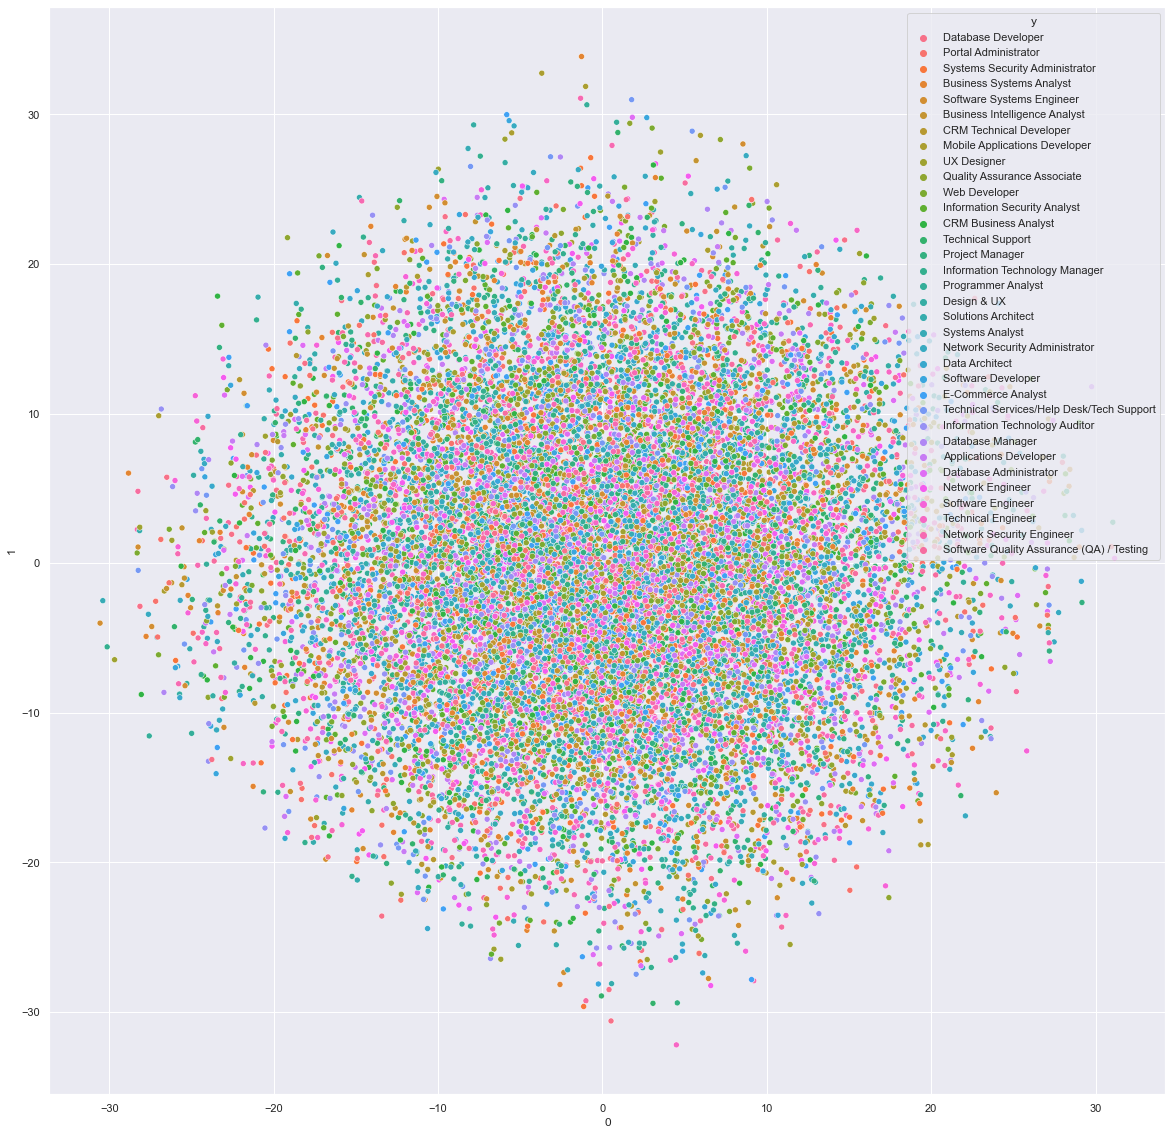

In [8]:
pca = PCA(n_components=2)
xpca = pca.fit_transform(x)
dfpca = pd.DataFrame(xpca)
dfpca['y']=df['Suggested Job Role']

lda = LDA(n_components=4)
xlda = lda.fit_transform(x,df['Suggested Job Role'])

sns.set(rc={'figure.figsize':(20,20)})
sns.scatterplot(x=dfpca[0],y=dfpca[1],hue=dfpca.y)

# Fitting on Grid

### With Test sizes of 0.2,0.25,0.3,0.35,0.4 respectively
### alpha values of .0000001,0.0001,0.001,0.01,0,1 respectively

In [10]:
ts= [0.2,0.25,0.3,0.35,0.4]
a=[0.0000001,0.0001,0.001,0.01,0,1]

In [11]:

grid(xpca,ts,a)

score with test size: 0.2 and alpha:1e-07:    0.369
confusion-matrix with test size: 0.2 and alpha:1e-07:
[[   9    3   13    4    8]
 [   3    1    4    2    3]
 [ 748  449 1456  447  776]
 [   1    0    3    2    1]
 [  14   11   25    9    8]]
score with test size: 0.2 and alpha:0.0001:    0.3645
confusion-matrix with test size: 0.2 and alpha:0.0001:
[[   3    8   22    2    5]
 [   5    2    6    1    2]
 [ 758  447 1440  453  775]
 [   0    1    0    1    2]
 [   9    6   33    7   12]]
score with test size: 0.2 and alpha:0.001:    0.37225
confusion-matrix with test size: 0.2 and alpha:0.001:
[[   3    2   12    0    2]
 [   4    0    2    4    4]
 [ 761  457 1472  456  776]
 [   0    1    1    1    1]
 [   7    4   14    3   13]]
score with test size: 0.2 and alpha:0.01:    0.374
confusion-matrix with test size: 0.2 and alpha:0.01:
[[   2    2   10    0    5]
 [   0    0    0    0    0]
 [ 770  460 1488  462  785]
 [   0    0    0    0    0]
 [   3    2    3    2    6]]
score wit

In [12]:
grid(xlda,ts,a)

score with test size: 0.2 and alpha:1e-07:    0.28425
confusion-matrix with test size: 0.2 and alpha:1e-07:
[[132  84 255  78 125]
 [ 47  27  84  19  40]
 [428 239 820 267 447]
 [ 50  37 126  36  62]
 [118  77 216  64 122]]
score with test size: 0.2 and alpha:0.0001:    0.2945
confusion-matrix with test size: 0.2 and alpha:0.0001:
[[ 93  52 166  53  65]
 [ 55  34 116  38  61]
 [457 262 897 265 497]
 [ 43  33 111  28  47]
 [127  83 211  80 126]]
score with test size: 0.2 and alpha:0.001:    0.292
confusion-matrix with test size: 0.2 and alpha:0.001:
[[107  57 234  56 107]
 [ 49  33  73  30  43]
 [449 264 867 278 475]
 [ 29  24  68  20  30]
 [141  86 259  80 141]]
score with test size: 0.2 and alpha:0.01:    0.30175
confusion-matrix with test size: 0.2 and alpha:0.01:
[[ 97  50 208  51  69]
 [ 42  30  65  27  37]
 [498 294 926 308 516]
 [ 44  27  81  25  45]
 [ 94  63 221  53 129]]
score with test size: 0.2 and alpha:0:    0.27575
confusion-matrix with test size: 0.2 and alpha:0:
[[105  

In [13]:
grid(x,ts,a)

score with test size: 0.2 and alpha:1e-07:    0.24125
confusion-matrix with test size: 0.2 and alpha:1e-07:
[[159  95 314  97 176]
 [ 85  49 168  62  77]
 [291 172 570 161 336]
 [ 81  40 119  40  60]
 [159 108 330 104 147]]
score with test size: 0.2 and alpha:0.0001:    0.2485
confusion-matrix with test size: 0.2 and alpha:0.0001:
[[146  93 285  91 164]
 [ 94  44 154  52  79]
 [333 187 600 195 309]
 [ 66  50 171  41  81]
 [136  90 291  85 163]]
score with test size: 0.2 and alpha:0.001:    0.2505
confusion-matrix with test size: 0.2 and alpha:0.001:
[[143 110 289  91 151]
 [ 69  42 142  47  91]
 [320 191 618 175 317]
 [ 86  43 160  44  82]
 [157  78 292 107 155]]
score with test size: 0.2 and alpha:0.01:    0.25925
confusion-matrix with test size: 0.2 and alpha:0.01:
[[128  73 241  89 139]
 [ 87  45 168  32  66]
 [357 209 665 209 369]
 [ 89  37 148  43  66]
 [114 100 279  91 156]]
score with test size: 0.2 and alpha:0:    0.25675
confusion-matrix with test size: 0.2 and alpha:0:
[[150 

### confusion matrix visualisation of a reasonable outcome

In [17]:
# score with test size: 0.4 and alpha:0:    0.27575
# confusion-matrix with test size: 0.4 and alpha:0:


X_train, X_test, y_train, y_test = train_test_split(xlda, y, stratify=y,random_state=1,test_size=0.4)

clf = MLPClassifier(hidden_layer_sizes=(300,200,100),alpha=0 ,max_iter=200).fit(X_train, y_train)

cm = confusion_matrix(clf.predict(X_test),y_test)



<Figure size 720x720 with 0 Axes>

<AxesSubplot:>

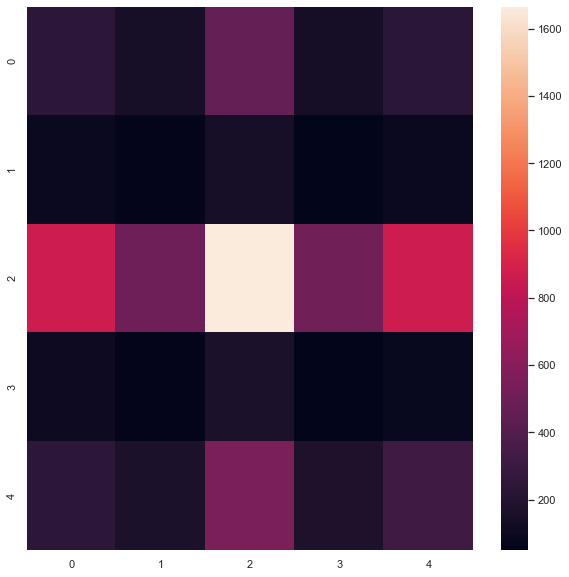

In [20]:
sns.set(rc={'figure.figsize':(10,10)})
sns.heatmap(cm)

# Conclusion

### The data shows a reasonable class distribution in the confusion matrix for lower values of accuracies
### As we reach higher accuracy the class distribution tends to get imbalanced.
### For most train-test ratio, smaller value of the alpha value tends to give a more balanced confusion matrix
